# Exploratory Data Analysis

## Seismic Review: 50 years of US Earthquake Data

### Eric Hepp


#### Visualization of the quake dataset
 - Map showing location and itensity, maybe interactive , maybe dot size variations for magnitude
   ( this is like an interactive variant of the standard seismic risk maps )
     - with a slider bar for year,  # this would show the "bloom" in Oklahoma quakes over last 10 years
     - and or a slider bar for magnitide
 - Frequency bar charts per decade (or maybe half decade) divisions, grouped/binned by magnitude, with bars green to red for increasing magnitude  
 - Frequency by depth - still considering if this is useful or interesting
 - Felt area by magnitide showing geographic differences, maybe just example quakes in various areas
 - location of reporting agencies/labs with indicator of number of contributions to the dataset
 - magnitude calculation types by distance of seismograph from epicenter
 - Scatter plot of relationship between mmi and cdi  intensity assessments, possibly grouped by region

In [1]:
# Read in the dateset from csv

import pandas as pd

df = pd.read_csv('./RetrieveData/US-quake-raw.csv')
df.shape

(114503, 30)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114503 entries, 0 to 114502
Data columns (total 30 columns):
id         114503 non-null object
lat        114503 non-null float64
long       114503 non-null float64
depth      114498 non-null float64
alert      693 non-null object
cdi        14130 non-null float64
code       114503 non-null object
detail     114503 non-null object
dmin       68118 non-null float64
felt       14130 non-null float64
gap        105961 non-null float64
ids        114503 non-null object
mag        114503 non-null float64
magType    114417 non-null object
mmi        2955 non-null float64
net        114503 non-null object
nst        98355 non-null float64
place      114503 non-null object
rms        108641 non-null float64
sig        114503 non-null int64
sources    114503 non-null object
status     114503 non-null object
time       114503 non-null int64
title      114503 non-null object
tsunami    114503 non-null int64
type       114503 non-null object
types 

In [3]:
# Correctly type the dataset

# Already are floats
#       lat, long, depth, cdi, dmin, gap, mag, mmi, rms, felt, nst, tz
# df[['lat','long', 'depth', 'cdi', 'dmin', 'gap', 'mag', 'mmi', 'rms']] = \
# df[['lat','long', 'depth', 'cdi', 'dmin', 'gap', 'mag', 'mmi', 'rms']].apply(pd.to_numeric, errors='coerce')

# Already are its
#       sig


# Convert to int when in subset dataframe to avoid having to deal with NaN
#       felt, nst, tz
# df['felt'] = df['felt'].astype(int)
# df['nst'] = df['nst'].astype(int)
# df['tz'] = df['tz'].astype(int)

# Convert to boolian 
#   tsunami
# df['tsunami'] = df['tsunami'].apply(pd.to_numeric, errors='coerce')
df['tsunami'] = df['tsunami'].astype(bool)

# Convert to date/time  
#           see: https://stackoverflow.com/questions/21787496/converting-epoch-time-with-milliseconds-to-datetime
#           example code given in cell below
#   time, updated

import datetime

# df['time'] = df['time'].apply(pd.to_numeric)
# df['updated'] = df['updated'].apply(pd.to_numeric)

df['time'] = df['time'].astype(int)
df['updated'] = df['updated'].astype(int)

df['time'] = df['time'].map(lambda x: datetime.datetime.fromtimestamp(int(x)/1000.0) )
df['updated'] = df['updated'].map(lambda x: datetime.datetime.fromtimestamp(int(x)/1000.0) )


# Convert to ordinal 
#   alert
#
# This code will convert, but how to handle blanks, which mean no alert issued? 
# Is it OK to make them 0, or does that give some unintended importance?
def ordinize(strval, ordered_list, start_idx, idx_skip):
    i = 0
    for val in ordered_list:
        if strval == val:
            return i*idx_skip + start_idx
        i += 1

df['alert'] = df['alert'].apply(lambda x: ordinize(x, ['green', 'yellow', 'red'], 1, 1))
df['alert'] = df['alert'].fillna(value=0)

# dummy (if used - not sure they will be needed for any of the project goals)
#   magType, net, sources, status

# leave as string (informational and reference only, not needed for model learning or prediction)
#   id, code detail, ids, place, title, type, types, url



In [4]:
# Handle missing values

# Depth: 5 missing - delete these rows
df = df.dropna(subset=['depth'])

# magType: 86 missing,  fill with 'Unknown'  (there is one existing with Unknown)
df['magType'] = df['magType'].fillna(value='Unknown')


# cdi, mmi, felt:  Leave as NaN, analysis of mmi cdi/felt relationship will be done for existing values only
# dmin, gap, nst, rms, tz: Leave as NaN, no planned analysis or modeling uses these features.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114498 entries, 0 to 114502
Data columns (total 30 columns):
id         114498 non-null object
lat        114498 non-null float64
long       114498 non-null float64
depth      114498 non-null float64
alert      114498 non-null float64
cdi        14130 non-null float64
code       114498 non-null object
detail     114498 non-null object
dmin       68118 non-null float64
felt       14130 non-null float64
gap        105961 non-null float64
ids        114498 non-null object
mag        114498 non-null float64
magType    114498 non-null object
mmi        2955 non-null float64
net        114498 non-null object
nst        98355 non-null float64
place      114498 non-null object
rms        108641 non-null float64
sig        114498 non-null int64
sources    114498 non-null object
status     114498 non-null object
time       114498 non-null datetime64[ns]
title      114498 non-null object
tsunami    114498 non-null bool
type       114498 non-null o

In [160]:
df[df['id'] == 'usp000j7ae']

,id,lat,long,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
113957,usp000j7ae,-81.27,39.4,5.0,0.0,3.8,p000j7ae,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,74.0,...,2011-08-31 05:35:12.410,M 2.8 - Ohio,False,earthquake,"associate,dyfi,impact-text,origin,phase-data",NaN,2015-03-23 21:47:19.954,https://earthquake.usgs.gov/earthquakes/eventp...,2,2011


In [161]:
df[df['id'] == 'se609233']

,id,lat,long,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
113958,se609233,-77.98,37.906167,7.25,0.0,4.7,609233,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,359.0,...,2011-08-29 23:48:28.740,"M 2.6 - 13km S of Louisa, Virginia",False,earthquake,"associate,dyfi,general-link,geoserve,impact-te...",-300.0,2016-04-08 10:01:41.030,https://earthquake.usgs.gov/earthquakes/eventp...,2,2011


## Discussion

All data was obtained from the USGS Common Catalog API, and was supplied in text format.  In the above steps data were converted to the appropriate type.  Five quakes missing depth data were deleted.  For 86 quakes missing the type of calculation used to determine magnitude, the type was set to 'Unknown." 

The dataset is incomplete for cdi, mmi, felt.  This is expected, as not all information is recorded for every quake.  Analysis of mmi cdi/felt relationship will be done using samples where this data exists. Likewise, dmin, gap, nst, rms, and tz have missing values. No correct or imputation is anticipated, as there ino planned analysis or modeling using these features in this project.

A data dictionary describing this data is availabe at https://earthquake.usgs.gov/data/comcat/data-eventterms.php   

Of most importance to this project will be **time, lat, long, depth, magnitude, mmi** and **cdi.**  

time       114498 non-null datetime64[ns]
id         114498 non-null object
lat        114498 non-null float64
long       114498 non-null float64
depth      114498 non-null float64
cdi        14130 non-null float64
felt       14130 non-null float64
mag        114498 non-null float64
mmi        2955 non-null float64 

The Modified Mercali Intensity (mmi) is only computed for quakes that cause damage, and cdi is computed from citizen reports beginning around 2005.  The full dataset will be used to examine any changes in earthquake frequency over time, and the smaller dataset of mmi/cdi will be used to calibrate the cdi intensity data.  With that done, the slighty larger cdi dataset can be used to explore the relationship between magnitude and intensity, and to validate the current formulas, and to develop new, more regionally focused, formulas.  
  
My evolving list of questions to attempt to answer with this data include ...

- have there been any increase or decrease in # of quakes in specific regions?
   - by depth, by magnitude, by intensity  
   - can we group by state, by zip code, by geologic unit, by fault zone …  
     - need to geocode, and somehow classify geologic characteristics  
   - can it be correlated to human activity, especially fracking or injection (these are separate)   
   
- Are there more discrete regional differences in magnitude/intensity relationship   
  
- Is citizen reported DYFI data, converted to CDI, accurate.  Does it correspond with MMI 


In [9]:
# Create a 'binned' magnitude column for later gropuing and plotting
# Need to make this an integer number for color coding points, so ....
# This will be called the magDecade, and will be set to the lowest integer in the decace
# Thus,  7 will mean quakes with magnitude from 7 - 7.999
#        6 will mean quakes with magnitude from 6 - 6.999   etc.


def magDecade(x):
    if x >= 8.0:
        mbin = 8
    elif x >= 7.0 and x < 8.0:
        mbin = 7
    elif x >= 6.0 and x < 7.0:
        mbin = 6
    elif x >= 5.0 and x < 6.0:  
        mbin = 5
    elif x >= 4.0 and x < 5.0:
        mbin = 4
    elif x >= 3.0 and x < 4.0:
        mbin = 3
    else:
        mbin = 2   # Dataset was restricted to quakes with magnitude greater than 2.5

    return mbin

df['magDecade'] = df['mag'].apply(lambda x: magDecade(x))

df['magDecade'].value_counts(dropna=False)


2    71425
3    36662
4     5677
5      656
6       69
7        9
Name: magDecade, dtype: int64

In [10]:
# Create a year column for later grouping and plotting 

df['year'] = df['time'].map(lambda x: getattr(x, 'year'))


In [5]:
df.head()

,id,lat,long,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
0,nc1022389,-121.873500,36.593000,4.946,0.0,NaN,1022389,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03694,NaN,...,1974-12-30 13:28:16.830,M 3.4 - Central California,False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:44.940,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
1,nc1022388,-121.464500,36.929000,3.946,0.0,NaN,1022388,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04144,NaN,...,1974-12-30 09:46:54.820,M 3.0 - Central California,False,earthquake,"nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:33.974,https://earthquake.usgs.gov/earthquakes/eventp...,2,1974
2,ci3319041,-116.128833,29.907667,6.000,0.0,NaN,3319041,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.73400,NaN,...,1974-12-30 08:12:47.870,"M 4.6 - 206km SSE of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:48:03.640,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
3,usp00009ad,-116.402000,30.424000,33.000,0.0,NaN,p00009ad,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-30 08:12:15.300,"M 4.0 - offshore Baja California, Mexico",False,earthquake,origin,NaN,2014-11-06 18:21:28.071,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
4,usp000099y,-116.185000,30.757000,33.000,0.0,NaN,p000099y,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-29 07:07:01.500,"M 4.2 - offshore Baja California, Mexico",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:18:24.990,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974


In [162]:
# Save this cleaned up dataset 

# df.to_csv("./clean_quakes.csv", index=False)


In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv("./clean_quakes.csv")

In [36]:
# Oops, the latitude and longitude are swapped, need to fix the column headers to match data.

df.rename(columns={'lat': 'newlong', \
                        'long': 'newlat'}, inplace=True)

In [37]:
df.rename(columns={'newlong': 'long', \
                        'newlat': 'lat'}, inplace=True)

In [38]:
print df.shape
df.head()

(114498, 32)


,id,long,lat,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
0,nc1022389,-121.873500,36.593000,4.946,0.0,NaN,1022389,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03694,NaN,...,1974-12-30 13:28:16.830,M 3.4 - Central California,False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:44.940,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
1,nc1022388,-121.464500,36.929000,3.946,0.0,NaN,1022388,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04144,NaN,...,1974-12-30 09:46:54.820,M 3.0 - Central California,False,earthquake,"nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:33.974,https://earthquake.usgs.gov/earthquakes/eventp...,2,1974
2,ci3319041,-116.128833,29.907667,6.000,0.0,NaN,3319041,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.73400,NaN,...,1974-12-30 08:12:47.870,"M 4.6 - 206km SSE of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:48:03.640,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
3,usp00009ad,-116.402000,30.424000,33.000,0.0,NaN,p00009ad,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-30 08:12:15.300,"M 4.0 - offshore Baja California, Mexico",False,earthquake,origin,NaN,2014-11-06 18:21:28.071,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
4,usp000099y,-116.185000,30.757000,33.000,0.0,NaN,p000099y,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-29 07:07:01.500,"M 4.2 - offshore Baja California, Mexico",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:18:24.990,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974


In [39]:
print df.iloc[0,2], df.iloc[0,1]

36.593 -121.8735


In [42]:
list(df.columns)

['id',
 'long',
 'lat',
 'depth',
 'alert',
 'cdi',
 'code',
 'detail',
 'dmin',
 'felt',
 'gap',
 'ids',
 'mag',
 'magType',
 'mmi',
 'net',
 'nst',
 'place',
 'rms',
 'sig',
 'sources',
 'status',
 'time',
 'title',
 'tsunami',
 'type',
 'types',
 'tz',
 'updated',
 'url',
 'magDecade',
 'year']

In [44]:
df[['depth', 'alert', 'mmi', 'cdi', 'felt', 'mag', 'time']].columns

Index([u'depth', u'alert', u'mmi', u'cdi', u'felt', u'mag', u'time'], dtype='object')

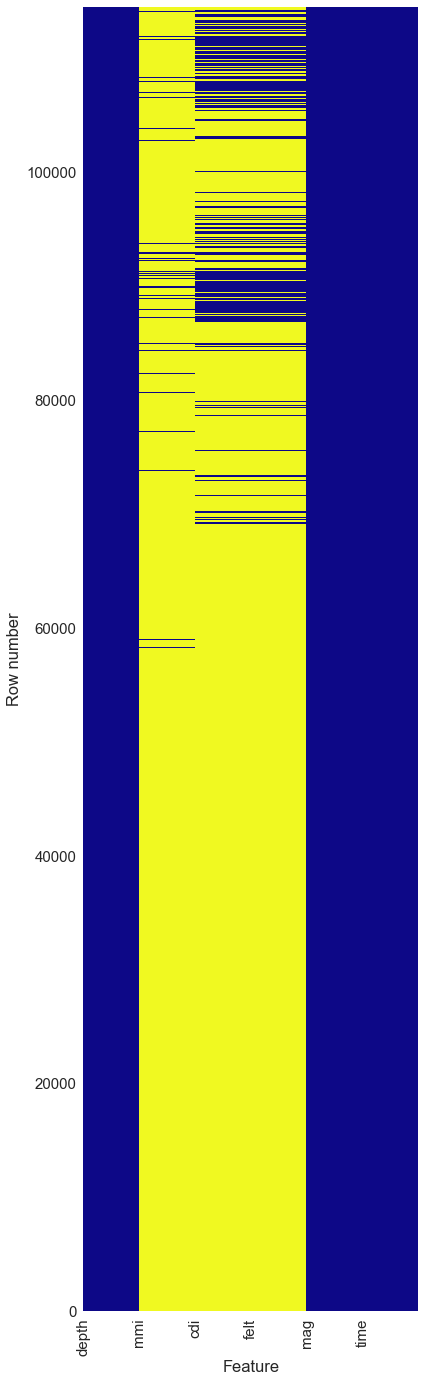

In [55]:
# A map of missing data.  Clearly, it will be necessary to subset the quakes to use only those that have 
# available intensity data

# Seaborn is just a quick way to adjust font scale that seems to apply to matplotlib 
# graphs drawn after this is called
import seaborn as sns
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(6,24))

ax.pcolor(df[['depth', 'mmi', 'cdi', 'felt', 'mag', 'time']].isnull(), cmap='plasma')
ax.set_ylabel("Row number")
ax.set_xlabel("Feature")
ax.set_xticklabels(df[['depth', 'mmi', 'cdi', 'felt', 'mag', 'time']].columns, rotation=90 )
plt.show()

In [55]:

df['q_country'] = np.nan
df['q_state'] = np.nan
df['q_county'] = np.nan
df['q_zip_code'] = np.nan

In [56]:
df.head()

,id,long,lat,depth,alert,cdi,code,detail,dmin,felt,...,types,tz,updated,url,magDecade,year,q_country,q_state,q_county,q_zip_code
0,nc1022389,-121.873500,36.593000,4.946,0.0,NaN,1022389,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03694,NaN,...,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:44.940,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974,NaN,NaN,NaN,NaN
1,nc1022388,-121.464500,36.929000,3.946,0.0,NaN,1022388,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04144,NaN,...,"nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:33.974,https://earthquake.usgs.gov/earthquakes/eventp...,2,1974,NaN,NaN,NaN,NaN
2,ci3319041,-116.128833,29.907667,6.000,0.0,NaN,3319041,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.73400,NaN,...,"origin,phase-data",NaN,2016-01-28 20:48:03.640,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974,NaN,NaN,NaN,NaN
3,usp00009ad,-116.402000,30.424000,33.000,0.0,NaN,p00009ad,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,origin,NaN,2014-11-06 18:21:28.071,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974,NaN,NaN,NaN,NaN
4,usp000099y,-116.185000,30.757000,33.000,0.0,NaN,p000099y,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,"origin,phase-data",NaN,2016-01-28 20:18:24.990,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974,NaN,NaN,NaN,NaN


In [57]:
country = []
state = []
county = []
zip_code = []
quakes = []
idxs = []

In [58]:
def is_offshore(qlat, qlong): 
    if (qlat > 39) and (qlong < -124):
        return True
    elif qlong < (-114 + (qlat-26)*(-10/13.)):
        return True
    else:
        return False

print is_offshore(36, -121)

False


In [70]:
len(df)

114498

In [73]:
# Use geocode to add columns for country, state, county and postal_code

from pygeocoder import Geocoder

for idx in range(114000, 114498):
    if idx % 100 == 0:
        print "Retrieving geopolitical info for records", idx, "to", idx+100
        quake_id = df.loc[idx,'id']
        quakes.append(quake_id)
        idxs.append(idx)
    
    if is_offshore(df.iloc[idx,2], df.iloc[idx,1]):
        country.append('offshore')
        state.append('offshore')
        county.append('offshore')
        zip_code.append('offshore')
        df.loc[idx, 'country'] = 'offshore'
        df.loc[idx, 'state'] = 'offshore'
        df.loc[idx, 'county'] = 'offshore'
        df.loc[idx, 'zip_code'] = 'offshore'

    else:     
        try:
            results = Geocoder.reverse_geocode(df.iloc[idx,2], df.iloc[idx,1])
            country.append(results.country)
            state.append(results.state)
            county.append(results.county)
            zip_code.append(results.postal_code)
            df.loc[idx, 'country'] = results.country
            df.loc[idx, 'state'] = results.state
            df.loc[idx, 'county'] = results.county
            df.loc[idx, 'zip_code'] = results.postal_code

        except:
            country.append('offshore')
            state.append('offshore')
            county.append('offshore')
            zip_code.append('offshore')
            df.loc[idx, 'country'] = 'offshore'
            df.loc[idx, 'state'] = 'offshore'
            df.loc[idx, 'county'] = 'offshore'
            df.loc[idx, 'zip_code'] = 'offshore'

print "Done retrieving reverse codes" 


Retrieving geopolitical info for records 114000 to 114100
Retrieving geopolitical info for records 114100 to 114200
Retrieving geopolitical info for records 114200 to 114300
Retrieving geopolitical info for records 114300 to 114400
Retrieving geopolitical info for records 114400 to 114500
Done retrieving reverse codes


In [72]:
import pickle

# pickle.dump( df, open( "clean_quakes_geocode.p", "wb" ) )

# df = pickle.load( open( "save_losers_df.p", "rb" ) )

In [57]:
df.loc[0:10]

,id,long,lat,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
0,nc1022389,-121.873500,36.593000,4.946,0.0,NaN,1022389,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03694,NaN,...,1974-12-30 13:28:16.830,M 3.4 - Central California,False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:44.940,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
1,nc1022388,-121.464500,36.929000,3.946,0.0,NaN,1022388,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04144,NaN,...,1974-12-30 09:46:54.820,M 3.0 - Central California,False,earthquake,"nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:33.974,https://earthquake.usgs.gov/earthquakes/eventp...,2,1974
2,ci3319041,-116.128833,29.907667,6.000,0.0,NaN,3319041,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.73400,NaN,...,1974-12-30 08:12:47.870,"M 4.6 - 206km SSE of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:48:03.640,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
3,usp00009ad,-116.402000,30.424000,33.000,0.0,NaN,p00009ad,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-30 08:12:15.300,"M 4.0 - offshore Baja California, Mexico",False,earthquake,origin,NaN,2014-11-06 18:21:28.071,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
4,usp000099y,-116.185000,30.757000,33.000,0.0,NaN,p000099y,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-29 07:07:01.500,"M 4.2 - offshore Baja California, Mexico",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:18:24.990,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
5,nc1022384,-122.292833,37.926500,6.209,0.0,NaN,1022384,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.05045,NaN,...,1974-12-29 04:51:45.860,"M 3.5 - San Francisco Bay area, California",False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:22.660,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
6,ci3319043,-115.959333,30.692667,6.000,0.0,NaN,3319043,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.95600,NaN,...,1974-12-28 19:55:27.320,"M 3.6 - 128km SSE of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:42:46.790,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
7,ci3319050,-116.473000,30.733500,6.000,0.0,NaN,3319050,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.93600,NaN,...,1974-12-28 18:46:34.430,"M 3.9 - 110km S of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:48:03.100,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
8,usp000099k,-116.075000,30.860000,33.000,0.0,NaN,p000099k,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-28 18:18:38.800,"M 4.7 - Baja California, Mexico",False,earthquake,origin,NaN,2014-11-06 18:21:28.042,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
9,nc1022383,-121.459667,36.932000,6.066,0.0,NaN,1022383,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04595,NaN,...,1974-12-28 18:08:06.400,M 3.4 - Central California,False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:06.860,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974


In [7]:
# df['country'].value_counts(dropna=False)

In [9]:
# results = Geocoder.reverse_geocode(38.341000, -112.325000)
# results.country

In [81]:
len(df[(df['mmi'].notnull()) & (df['country'] == 'offshore')])

2947

In [35]:
len(df[df['long'] < -117])

64657

In [13]:
# Check for duplicate quakes  - there seem to be none with same ID

df[df.duplicated(subset='id')]

,id,lat,long,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year


In [61]:
# Earthquake Frequency

magSummary = df.groupby(['year', 'magDecade']).size().unstack()
magSummary = magSummary.fillna(0).astype(int)
# magSummary = magSummary[[7, 6, 5, 4, 3, 2]]
magSummary.loc[2000:2016].T


year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
magDecade,,,,,,,,,,,,,,,,,
2,1116,1108,953,1122,1684,1270,960,937,1370,1109,3666,1448,1138,1324,2840,3270,2431
3,560,569,490,628,886,655,502,399,695,487,1846,669,479,579,1241,1428,1067
4,95,117,82,123,103,124,94,76,140,94,233,160,126,125,131,111,98
5,5,19,11,11,11,13,15,23,36,16,19,22,13,9,9,9,18
6,1,3,0,4,0,1,1,1,1,3,1,1,3,1,2,0,1
7,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


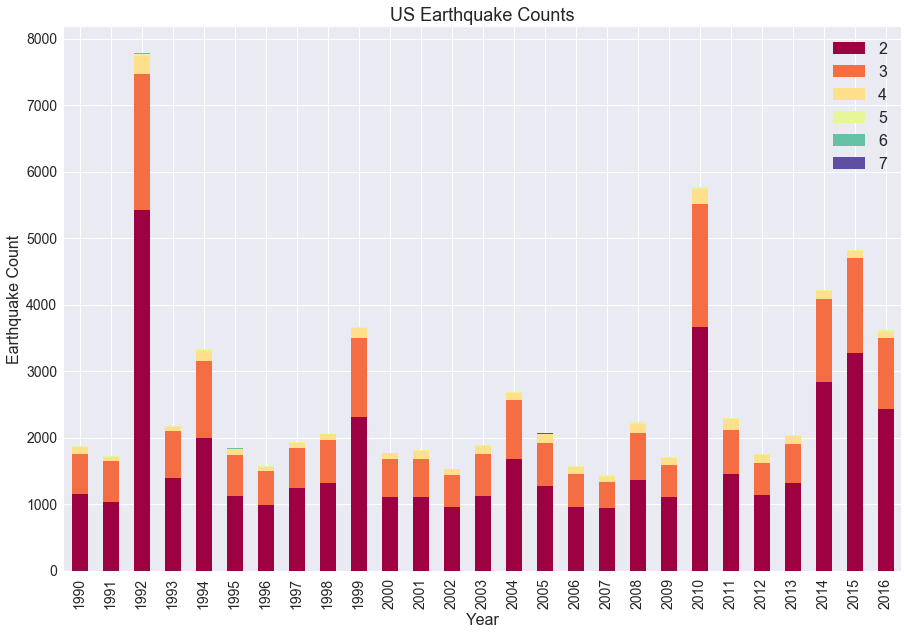

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')
%matplotlib inline

ax = magSummary.loc[1990:2016,2:7].plot(kind='bar',stacked=True, colormap='Spectral', \
#                                                title ="US Earthquake Counts", \
                                               figsize=(15, 10), legend=True, fontsize=14)

ax.set_title("US Earthquake Counts", fontsize=18 )
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Earthquake Count", fontsize=16)
ax.legend(fontsize=16)
plt.show()



In [13]:
import plotly.plotly as py
import pandas as pd

import plotly 
plotly.tools.set_credentials_file(username='erhepp', api_key='F6sL7oLP3PpzBpBDwz4U')
# erhepp   PLg3heim

In [15]:
df_magplot = df[df['year'] >= 2000][['id','mag','lat','long', 'magDecade']].sort_values('mag', axis=0, ascending=False)

In [16]:
df_magplot.shape

(44524, 5)

In [17]:
df_magplot.head()

,id,mag,lat,long,magDecade
76627,usp000dt25,7.2,41.292000,-125.953000,7
102793,ci14607652,7.2,32.286167,-115.295333,7
95549,usp000jhr6,7.0,28.696000,-113.104000,7
69494,usp000gzyb,6.9,29.039000,-112.903000,6
92456,nc72182046,6.8,40.828667,-125.133833,6


In [18]:
list(df_magplot.magDecade.value_counts().index)

[2, 3, 4, 5, 6, 7]

In [24]:
m = pd.DataFrame(df_magplot['magDecade'].value_counts())
mags = list(m.index)
counts = list(m.magDecade)
counts

[6587, 2867, 230, 28, 1]

In [25]:
df_magplot.head()

,id,mag,lat,long,magDecade
87646,us20007z6r,6.60,40.453500,-126.193600,6
89847,us20002l3n,5.90,44.497100,-129.958200,5
106484,us10006jxs,5.80,36.425100,-96.929100,5
89859,us20002kxa,5.80,44.458400,-129.811400,5
90434,nc72387946,5.72,40.317833,-124.606667,5


In [21]:
import numpy as np

In [22]:
8**4 / 4

1024

In [23]:
df_magplot = df[df['year'] >= 2015][['id','mag','lat','long', 'magDecade']].sort_values('mag', axis=0, ascending=False)

In [151]:
df_magplot['text'] = df_magplot['id'] + '<br>Magnitude ' + (df_magplot['mag']).astype(str)
magDecades=[8, 7, 6, 5, 4, 3, 2]
colors = ["rgb(255,0,0)", "rgb(255,90,0)", "rgb(255,160,0)", "rgb(255,255,0)",\
          "rgb(128,255,0)", "rgb(0,142,128)", "rgb(0,128,255)", "rgb(0,0,255)"]
quakes = []
scale = 4
i = 0

for mbin in magDecades:
    df_sub = df_magplot[df_magplot['magDecade'] == mbin]
    quake = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lat'],
        lat = df_sub['long'],
        text = df_sub['text'],
        marker = dict(
            size = (df_sub['mag']**4)/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0}'.format(mbin) )
    quakes.append(quake)
    i += 1

layout = dict(
        title = '2016 US Earthquakes<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=quakes, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-2016-magnitude' )

In [ ]:
xc

In [28]:
df_magplot = df[df['felt'] >= 5][['id','mag','lat','long', 'magDecade']]\
.sort_values('mag', axis=0, ascending=False)

In [30]:
df_magplot.head()

,id,mag,lat,long,magDecade,text
52250,ci3031111,7.3,34.200000,-116.437000,7,ci3031111<br>Magnitude 7.3
76627,usp000dt25,7.2,41.292000,-125.953000,7,usp000dt25<br>Magnitude 7.2
53521,nc269151,7.2,40.335333,-124.228667,7,nc269151<br>Magnitude 7.2
102793,ci14607652,7.2,32.286167,-115.295333,7,ci14607652<br>Magnitude 7.2
59833,ci9108652,7.1,34.603333,-116.265000,7,ci9108652<br>Magnitude 7.1


In [32]:
df_magplot['text'] = df_magplot['id'] + '<br>Magnitude ' + (df_magplot['mag']).astype(str)
magDecades=[8, 7, 6, 5, 4, 3, 2]
colors = ["rgb(255,0,0)", "rgb(255,90,0)", "rgb(255,160,0)", "rgb(255,255,0)",\
          "rgb(128,255,0)", "rgb(0,142,128)", "rgb(0,128,255)", "rgb(0,0,255)"]
quakes = []
scale = 4
i = 0

for mbin in magDecades:
    
    df_sub = df_magplot[df_magplot['magDecade'] == mbin]
    
    quake = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lat = df_sub['lat'],
        lon = df_sub['long'],
        text = df_sub['text'],
        marker = dict(
            size = (df_sub['mag']**4)/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0}'.format(mbin) )
    quakes.append(quake)
    i += 1

layout = dict(
        title = 'Earthquakes with DYFI data',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=quakes, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-2016-magnitude' )

In [34]:
df_magplot[df_magplot['magDecade']==6]

,id,mag,lat,long,magDecade,text
69494,usp000gzyb,6.90,29.039000,-112.903000,6,usp000gzyb<br>Magnitude 6.9
84887,uw10530748,6.80,47.149000,-122.726667,6,uw10530748<br>Magnitude 6.8
92456,nc72182046,6.80,40.828667,-125.133833,6,nc72182046<br>Magnitude 6.8
24345,nc1091100,6.70,36.231667,-120.312000,6,nc1091100<br>Magnitude 6.7
44469,ci3144585,6.70,34.213000,-118.537000,6,ci3144585<br>Magnitude 6.7
87646,us20007z6r,6.60,40.453500,-126.193600,6,us20007z6r<br>Magnitude 6.6
93051,usb000khbc,6.60,26.091300,-110.320900,6,usb000khbc<br>Magnitude 6.6
3543,ci3347678,6.60,34.416000,-118.370000,6,ci3347678<br>Magnitude 6.6
75403,usp000e7jp,6.60,28.164000,-112.117000,6,usp000e7jp<br>Magnitude 6.6
76551,usp000dt8h,6.60,40.773000,-126.574000,6,usp000dt8h<br>Magnitude 6.6


In [68]:
# Try to do the geocoding next ....   then plot by frequency in zip code or state

# Load packages
from pygeocoder import Geocoder


In [69]:
try:
    results = Geocoder.reverse_geocode(df_magplot.iloc[0,2], df_magplot.iloc[0,3])
except:
    print "Offshore"

Offshore


In [72]:
print df_magplot.iloc[1,2], df_magplot.iloc[1,3]

36.4251 -96.9291


In [83]:
results = Geocoder.reverse_geocode(df_magplot.iloc[1,2], df_magplot.iloc[1,3])
print results.country, ',', results.state, ',', results.county, ',', results.postal_code

United States , Oklahoma , Pawnee County , 74650


In [82]:
print results.country, ',', results.state, ',', results.county, ',', results.postal_code

United States , Oklahoma , Pawnee County , 74650


In [77]:
results.postal_code

u'74650'

In [78]:
results.county

u'Pawnee County'

In [79]:
results.current_data[short_]

NameError: name 'short_' is not defined

In [ ]:
results.postal_code

In [ ]:
df_magplot.head()

In [ ]:
df_magplot[df_magplot['id']=='us10007tv5']

In [ ]:
df_magplot.loc[87410,'lat']

In [ ]:
results = Geocoder.reverse_geocode(df_magplot.loc[87410,'lat'], df_magplot.loc[87410,'long'])

In [ ]:
results.country

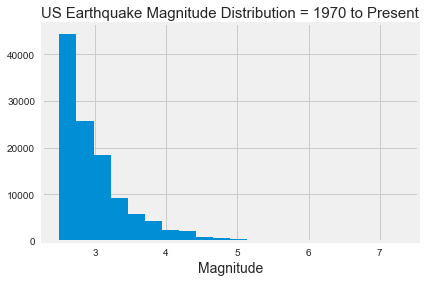

In [52]:
ax = df['mag'].hist(bins=20)
ax.set_title("US Earthquake Magnitude Distribution = 1970 to Present", fontsize=15)
ax.set_xlabel('Magnitude', fontsize=14)

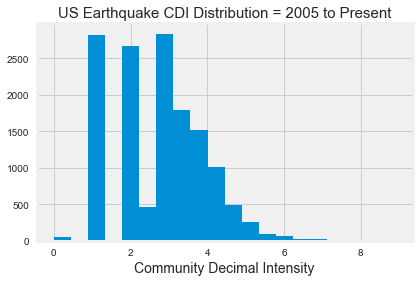

In [67]:
ax = df['cdi'].hist(bins=20)
ax.set_title("US Earthquake CDI Distribution = 2005 to Present", fontsize=15)
ax.set_xlabel('Community Decimal Intensity', fontsize=14)

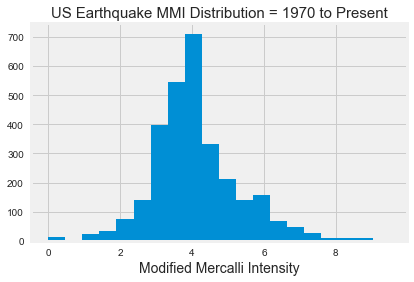

In [55]:
ax = df['mmi'].hist(bins=20)
ax.set_title("US Earthquake MMI Distribution = 1970 to Present", fontsize=15)
ax.set_xlabel('Modified Mercalli Intensity', fontsize=14)